# Bayes and Kpop HW Solutions

## Question 1: Bayes' Theorem with Poisson Distribution

**Given:**
| Student | Average Errors ($\lambda$) | Prior Probability | 
|:---:|:---:|:---:|
| A | $\lambda_A = 2$ | $P(A) = 0.5$ |
| B | $\lambda_B = 4$ | $P(B) = 0.5$ |

**Evidence:** $E = 3$ errors per page ($k=3$).
**Goal:** Find $P(A | E=3)$.

Poisson PMF: $P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$

In [3]:
import numpy as np
from math import factorial

lambda_A = 2
lambda_B = 4
k = 3
P_A = 0.5

def poisson_pmf(k, lam):
    return (lam**k * np.exp(-lam)) / factorial(k)

P_E3_A = poisson_pmf(k, lambda_A)
P_E3_B = poisson_pmf(k, lambda_B)

# P(E=3) = P(E=3 | A)P(A) + P(E=3 | B)P(B)
P_E3 = P_E3_A * P_A + P_E3_B * (1-P_A)

# P(A | E=3) = [ P(E=3 | A) * P(A) ] / P(E=3)
P_A_E3 = (P_E3_A * P_A) / P_E3

print(f"P(E=3|A) (Likelihood A): {P_E3_A:.4f}")
print(f"P(E=3|B) (Likelihood B): {P_E3_B:.4f}")
print(f"P(E=3) (Evidence): {P_E3:.4f}")
print(f"P(A|E=3) (Posterior): {P_A_E3:.4f}")

P(E=3|A) (Likelihood A): 0.1804
P(E=3|B) (Likelihood B): 0.1954
P(E=3) (Evidence): 0.1879
P(A|E=3) (Posterior): 0.4802


**Result:**
$$P(A | E=3) = \frac{P(E=3 | A)P(A)}{P(E=3)} \approx \frac{0.1804 \times 0.5}{0.1804 \times 0.5 + 0.1954 \times 0.5} \approx \frac{0.0902}{0.1878} \approx \mathbf{0.4798}$$

## Question 2: Association and Conditional Probability

|                   | Love ATEEZ (L) | Hate ATEEZ (H) | Marginal $P(\text{Fan})$ |
|:------------------|:--------------:|:--------------:|:-------------------|
| Huntrix fans (X)  | 0.20           | 0.30           | $P(X) = 0.50$      |
| Saja Boys fans (SB)| 0.35           | 0.15           | $P(SB) = 0.50$     |
| Marginal $P(\text{Sentiment})$ | $P(L) = 0.55$    | $P(H) = 0.45$    | 1.00               |

In [4]:
# joint
P_SBL = 0.35 # Saja Boys (SB), Love (L)
P_SBH = 0.15 # Saja Boys (SB), Hate (H)

# marginal
P_SB = P_SBL + P_SBH
P_L = 0.20 + P_SBL # total love
P_H = 0.30 + P_SBH # total hate

# conditional
P_L_SB = P_SBL / P_SB
P_H_SB = P_SBH / P_SB

print(f"Overall P(Love): {P_L:.2f}")
print(f"Overall P(Hate): {P_H:.2f}")
print(f"P(Love | SB): {P_L_SB:.2f}")
print(f"P(Hate | SB): {P_H_SB:.2f}")

Overall P(Love): 0.55
Overall P(Hate): 0.45
P(Love | SB): 0.70
P(Hate | SB): 0.30


**a) Do Saja Boys fans have an association with loving or hating ATEEZ?**

**Yes, there is an association.**
An association exists because the events are dependent, i.e., $P(\text{Sentiment} | \text{SB}) \neq P(\text{Sentiment})$.

*   $P(\text{Love ATEEZ} | \text{SB}) = \frac{0.35}{0.50} = \mathbf{0.70}$
*   $P(\text{Love ATEEZ}) = 0.55$

Since $0.70 \neq 0.55$, the sentiment of Saja Boys fans is associated with their fan group.

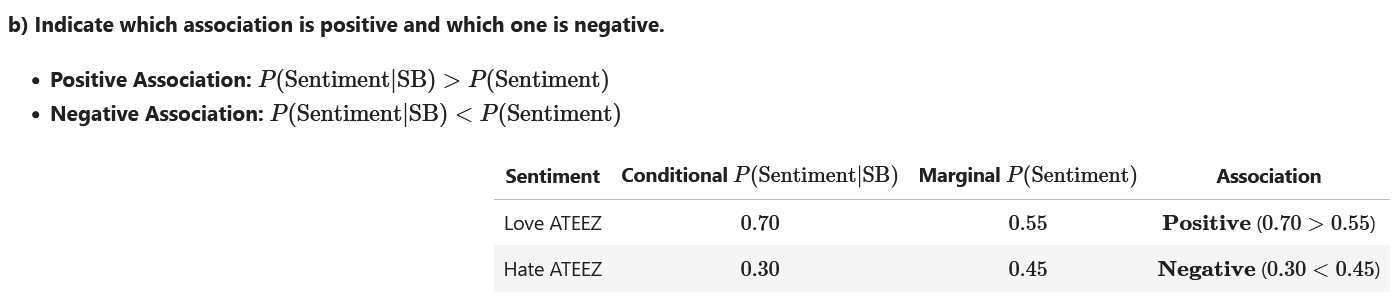